In [3]:
PATH = r'D:/Uni/M.1.1 - MLS for DS/M2 - Project'
import os
os.chdir(PATH)

In [2]:
%run setup.ipynb

In [4]:
tweet_df = pd.read_csv(f'{PATH}/covid19_tweets.csv',date_format="text")
tweet_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


<Axes: xlabel='day'>

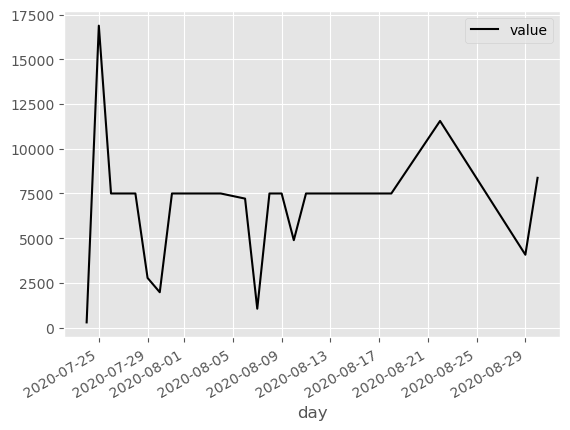

In [5]:
tweet_df= tweet_df.assign(value  = 1)
tweet_df["day"] = pd.to_datetime(pd.to_datetime(tweet_df['date']).dt.year.astype(str)+"-"+pd.to_datetime(tweet_df['date']).dt.month.astype(str)+"-"+pd.to_datetime(tweet_df['date']).dt.day.astype(str))
tweet_df.groupby("day").sum("value").drop(columns =["user_followers","user_friends","user_favourites","user_verified","is_retweet"]).plot(kind = "line",color="black")



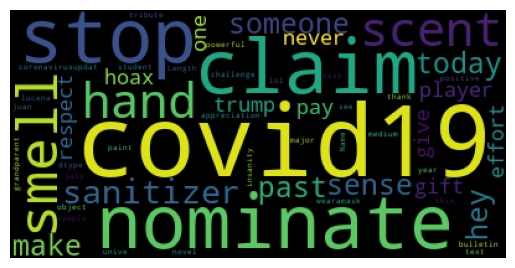

In [7]:
corpus_covid = pd.read_csv(f'{PATH}/covid19_tweets_for_graph.csv',date_format="text")

wordcloud = WordCloud().generate(str(corpus_covid.text))


plt.imshow(wordcloud)
plt.axis("off")
plt.show()

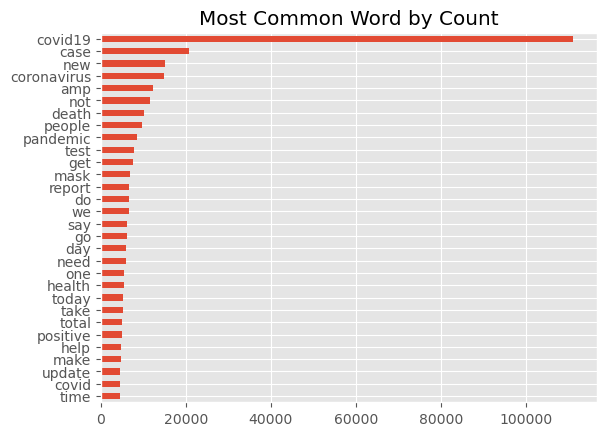

In [8]:
corpus_covid.text.str.split(expand=True).stack().value_counts(sort = True).head(30).plot( kind = "barh", title = "Most Common Word by Count").invert_yaxis()

In [5]:
corpus = pd.read_csv(f'{PATH}/covid19_tweets_off.csv',date_format="text")

#nltk.download('stopwords')
from nltk.corpus import stopwords
def stopwords_removal(corpus):
    new_words = ['s', 'that', 'we', "ve", 'not',"re"]
    stop = set(stopwords.words('english'))
    for word in new_words:
        stop.add(word)
    corpus = [[x for x in x.split() if x not in stop] for x in corpus]
    return corpus

nested_corpus = stopwords_removal(corpus.text)
corpus= pd.DataFrame([' '.join(x) for x in nested_corpus]).rename(columns = {0: "text"})
corpus

,text
0,smell scent hand sanitizer today someone past ...
1,would make sense player respect
2,trump never claim hoax claim effort
3,gift give appreciation simple thing always around
4,july medium bulletin novel
...,...
141207,really bum could time weiwei face mask create ...
141208,nothing day funddevelop test player
141209,wallkill school nurse add monitor daily duty
141210,thank nominate challenge nominate


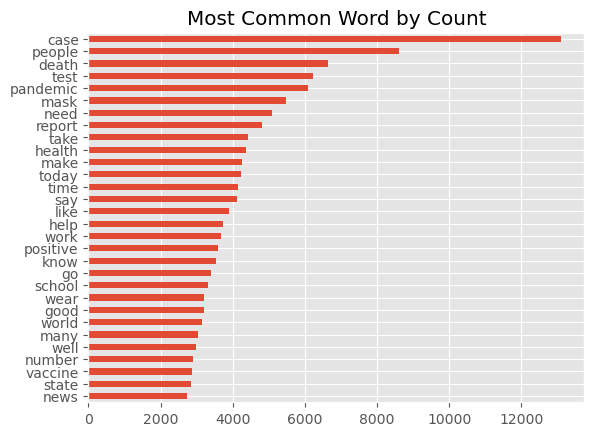

In [6]:
corpus.text.str.split(expand=True).stack().value_counts(sort = True).head(30).plot( kind = "barh", title = "Most Common Word by Count").invert_yaxis()

In [7]:

def generate_bigrams(text):
    tokens = word_tokenize(text)  
    bi_grams = list(bigrams(tokens))  
    return bi_grams

corpus['bigrams'] = corpus['text'].apply(generate_bigrams)

all_bigrams = [x for bigram in corpus['bigrams'] for x in bigram]
bigram_freq = Counter(all_bigrams)

pd.DataFrame.from_dict(bigram_freq, orient='index').rename(columns = {0: "count"}).sort_values(by = "count",ascending=False).head(30).plot( kind = "barh", title = "Most Common Bigram by Count").invert_yaxis()

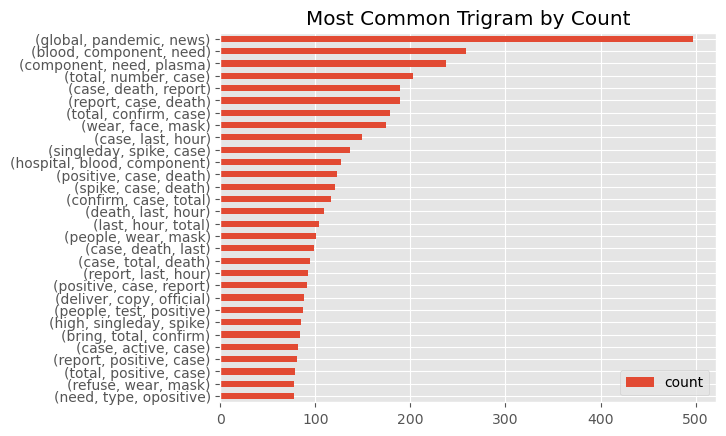

In [69]:
def generate_trigrams(text):
    tokens = word_tokenize(text)  
    tri_grams = list(trigrams(tokens))  
    return tri_grams

corpus['trigrams'] = corpus['text'].apply(generate_trigrams)

all_trigrams = [x for trigram in corpus['trigrams'] for x in trigram]
trigram_freq = Counter(all_trigrams)

pd.DataFrame.from_dict(trigram_freq, orient='index').rename(columns = {0: "count"}).sort_values(by = "count",ascending=False).head(30).plot( kind = "barh", title = "Most Common Trigram by Count").invert_yaxis()

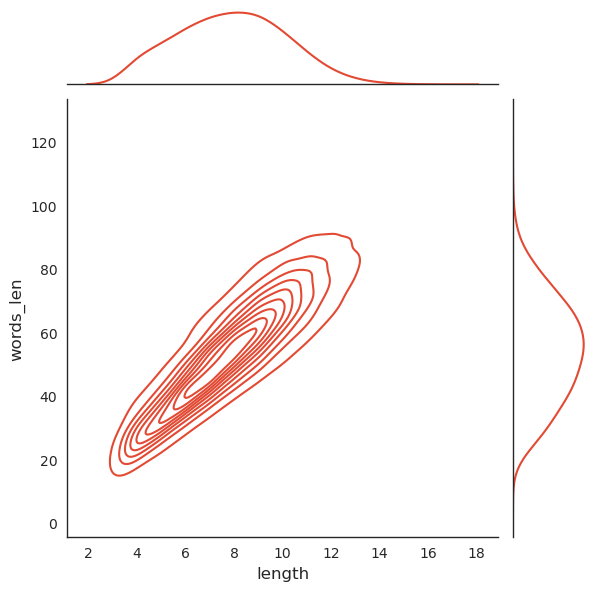

In [76]:
corpus["tweet_length"] = corpus["text"].str.split().apply(len)
corpus["words_len"] = [len(x) for x in corpus.text]

with sns.axes_style('white'):
    sns.jointplot(x="tweet_length", y="words_len", data=corpus.sample(10000), kind='kde', marginal_kws={"bw_adjust":2},joint_kws={"bw_adjust":1.2})

plt.show()
#sns.histplot(corpus["length"], kde = True, kde_kws={"bw_adjust":3},binwidth=1,color = "black").set_title('Word Count per Tweet \n Mean = {}'.format(round(corpus['length'].mean(),2)) )